In [1]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import plotly 
import plotly.figure_factory as ff
from plotly.offline import *
init_notebook_mode(connected=True)
from scipy.spatial import distance

%matplotlib inline
plt.style.use('ggplot')

/home/molash/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
file = pd.read_csv('data/whisky.csv')

In [3]:
file.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RowID       86 non-null     int64 
 1   Distillery  86 non-null     object
 2   Body        86 non-null     int64 
 3   Sweetness   86 non-null     int64 
 4   Smoky       86 non-null     int64 
 5   Medicinal   86 non-null     int64 
 6   Tobacco     86 non-null     int64 
 7   Honey       86 non-null     int64 
 8   Spicy       86 non-null     int64 
 9   Winey       86 non-null     int64 
 10  Nutty       86 non-null     int64 
 11  Malty       86 non-null     int64 
 12  Fruity      86 non-null     int64 
 13  Floral      86 non-null     int64 
 14  Postcode    86 non-null     object
 15  Latitude    86 non-null     int64 
 16  Longitude   86 non-null     int64 
dtypes: int64(15), object(2)
memory usage: 11.5+ KB


In [5]:
file.drop(['RowID', 'Postcode', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [6]:
file.isnull().sum()

Distillery    0
Body          0
Sweetness     0
Smoky         0
Medicinal     0
Tobacco       0
Honey         0
Spicy         0
Winey         0
Nutty         0
Malty         0
Fruity        0
Floral        0
dtype: int64

In [7]:
# detecting extreme values using IQR
Q1 = file.quantile(0.25)
Q3 = file.quantile(0.75)
IQR = Q3 - Q1

# removing outliers from the dataset
file = file[~((file < (Q1 - 1.5 * IQR)) | (file > (Q3 + 1.5 * IQR))).any(axis=1)]

file.shape

(38, 13)

In [8]:
def unique_values(df):
    for col in df.columns:
        print(df[col].unique())

In [9]:
unique_values(file)

['Aberfeldy' 'Ardmore' 'ArranIsleOf' 'Auchroisk' 'Aultmore' 'Balblair'
 'Benriach' 'Benromach' 'BlairAthol' 'Bowmore' 'Craigganmore' 'Dalwhinnie'
 'Deanston' 'Dufftown' 'GlenElgin' 'GlenGarioch' 'GlenKeith' 'GlenScotia'
 'Glenlivet' 'Glenmorangie' 'Glenrothes' 'Glenturret' 'Highland Park'
 'Isle of Jura' 'Knochando' 'Linkwood' 'Mannochmore' 'Miltonduff' 'Oban'
 'Scapa' 'Speyburn' 'Speyside' 'Springbank' 'Strathisla' 'Strathmill'
 'Teaninich' 'Tomatin' 'Tormore']
[2]
[2 3 1 4]
[2 1 3]
[0 1 2]
[0]
[2 1 0]
[1 0 2 3]
[2 1 0]
[2 0 1 3]
[2 3 1 0]
[2 1 3 0]
[2 1 3 0]


In [11]:
# # convert categorical variables into integers
# X = file
# y = file['Distillery']

# le = LabelEncoder()
# X['Distillery'] = le.fit_transform(X['Distillery'])
# y = le.transform(y)

In [12]:
# X.info()

In [13]:
# # feature scaling
# cols = X.columns
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X) 

In [14]:
# X = pd.DataFrame(X, columns=[cols])

In [15]:
# # Fit K-means model
# k_means = KMeans(n_clusters=2, random_state=0)
# k_means.fit(X)

In [16]:
# # model parameters

# k_means.inertia_

In [17]:
# # Quality of classification by model
# labels = k_means.labels_
# correct_labels = sum(y==labels)
# print('Results: %d out of %d samples were correctly labeled.' %(correct_labels, y.size))

In [18]:
# print('Accuracy score: {0:0.2f}'.format(correct_labels/float(y.size)))

The model has a weak classification accuracy of 1%  

In [19]:
# # Apply Elbow Method to find optimal number of clusters
# cs = []
# for i in range(1, 14):
#     k_means = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     k_means.fit(X)
#     cs.append(k_means.inertia_)
# plt.plot(range(1,14), cs)
# plt.title('The Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('CS')
# plt.show()

In [20]:
# # KMeans model with 3 clusters
# k_means = KMeans(n_clusters=3, random_state=0)
# k_means.fit(X)

# labels = k_means.labels_
# correct_labels = sum(y==labels)
# print("Result: %d out of %d samples were correctly labeled." %(correct_labels, y.size))
# print("Accuracy score: {0:0.2f}".format(correct_labels/float(y.size)))

In [21]:
# # KMeans model with 4 clusters
# k_means = KMeans(n_clusters=4, random_state=0)
# k_means.fit(X)

# labels = k_means.labels_
# correct_labels = sum(y==labels)
# print("Result: %d out of %d samples were correctly labeled." %(correct_labels, y.size))
# print("Accuracy score: {0:0.2f}".format(correct_labels/float(y.size)))

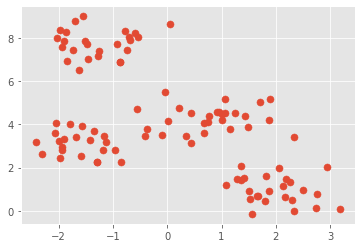

In [22]:
X, y_true = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [31]:
# feature scaling
# cols = X.columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X) 

In [24]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

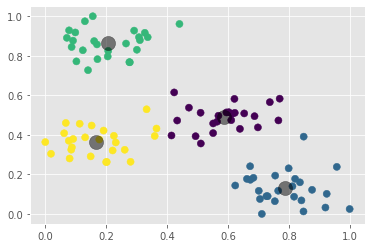

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

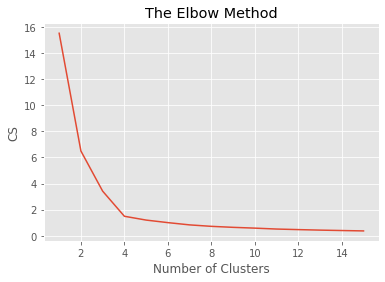

In [26]:
# Apply Elbow Method to find optimal number of clusters
cs = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1,16), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CS')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_
correct_labels = sum(y_true==labels)
print("Result: %d out of %d samples were correctly labeled." %(correct_labels, y_true.size))
print("Accuracy score: {0:0.2f}".format(correct_labels/float(y_true.size)))

Result: 48 out of 100 samples were correctly labeled.
Accuracy score: 0.48


In [28]:
features = ['Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral']
whisky = file[features]
distilleries = file['Distillery'].tolist()
whisky_plot = ff.create_dendrogram(whisky, orientation='bottom', labels=distilleries)
whisky_plot['layout'].update({'width':1400, 'height':600, 'title': 'Scotch Whisky', 'yaxis':{'title':'Distance'}})
plotly.offline.plot(whisky_plot, filename='whisky_dendrogram.html')

'whisky_dendrogram.html'

In [29]:
dst = distance.euclidean(a, b)

NameError: name 'a' is not defined